C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N0/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N4/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N6/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N9/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N10/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N11/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N17/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N22/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N29/r

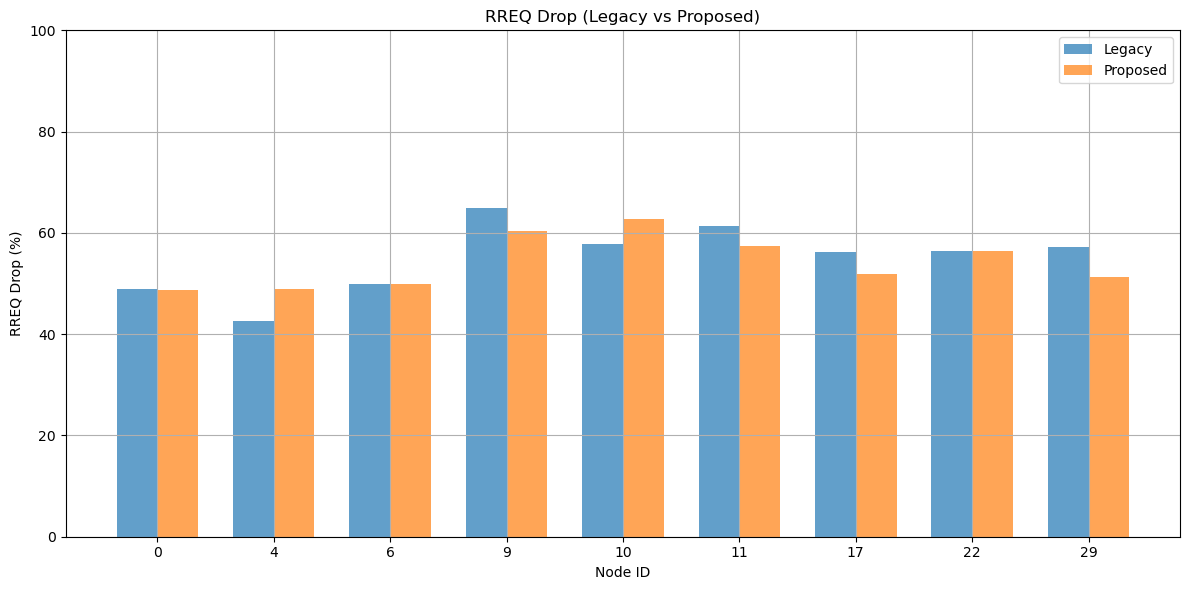

In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_total = 0
        rreq_drop = 0
        
        print(rreq_file)

        if os.path.isfile(rreq_file):
            
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)
print("Legacy S10 RREQ Drop:")
for n in h_node:
    print(f"Node {n}: {rreq_drop_legacy[n]:.2f}%")

print("Proposed S10 RREQ Drop:")
for n in h_node:
    print(f"Node {n}: {rreq_drop_proposed[n]:.2f}%")


nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed)')
plt.ylim(0, 100)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_30832\579047731.py:56: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_30832\579047731.py:56: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  plt.tight_layout()
c:\Conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


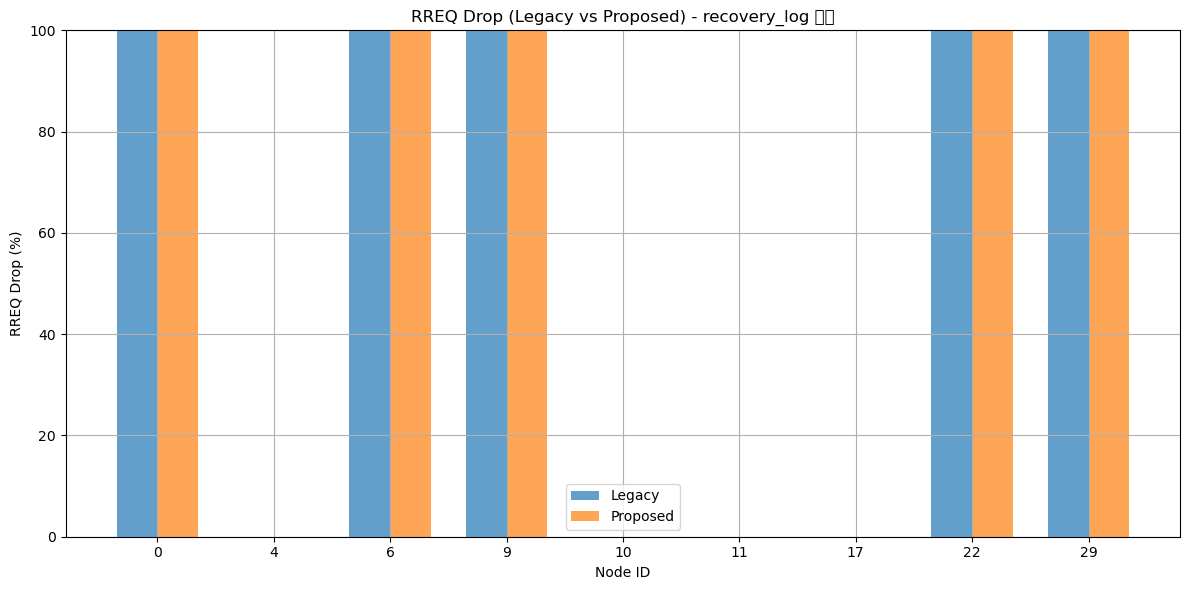

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S10/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S10/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        drop_file = node_path + 'sinr_drop_log.csv'
        recovery_file = node_path + 'recovery_log.csv'

        rreq_total = 0
        rreq_drop = 0

        if os.path.isfile(recovery_file):
            df_rec = pd.read_csv(recovery_file, header=None)
            df_rec.columns = ['Time', 'Node', 'Dest', 'Type']
            df_rec['NodeID'] = df_rec['Node'].astype(str).str.extract(r'node\[(\d+)\]').astype(float)
            rreq_total = len(df_rec[(df_rec['Type'] == 'RREQ_SENT') & (df_rec['NodeID'] == node)])

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

# 시각화
nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed) - recovery_log 기준')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[Legacy] Node 0: Sent = 26106, Dropped = 105673, Drop Ratio = 404.78%
[Legacy] Node 4: Sent = 19, Dropped = 7, Drop Ratio = 36.84%
[Legacy] Node 6: Sent = 22201, Dropped = 83640, Drop Ratio = 376.74%
[Legacy] Node 9: Sent = 20199, Dropped = 78794, Drop Ratio = 390.09%
[Legacy] Node 10: Sent = 152, Dropped = 330, Drop Ratio = 217.11%
[Legacy] Node 11: Sent = 1143, Dropped = 2398, Drop Ratio = 209.80%
[Legacy] Node 17: Sent = 536, Dropped = 1678, Drop Ratio = 313.06%
[Legacy] Node 22: Sent = 9287, Dropped = 34783, Drop Ratio = 374.53%
[Legacy] Node 29: Sent = 14194, Dropped = 56070, Drop Ratio = 395.03%
[Proposed] Node 0: Sent = 24484, Dropped = 96651, Drop Ratio = 394.75%
[Proposed] Node 4: Sent = 19, Dropped = 7, Drop Ratio = 36.84%
[Proposed] Node 6: Sent = 6472, Dropped = 21047, Drop Ratio = 325.20%
[Proposed] Node 9: Sent = 24261, Dropped = 91172, Drop Ratio = 375.80%
[Proposed] Node 10: Sent = 152, Dropped = 330, Drop Ratio = 217.11%
[Proposed] Node 11: Sent = 1143, Dropped = 2398,

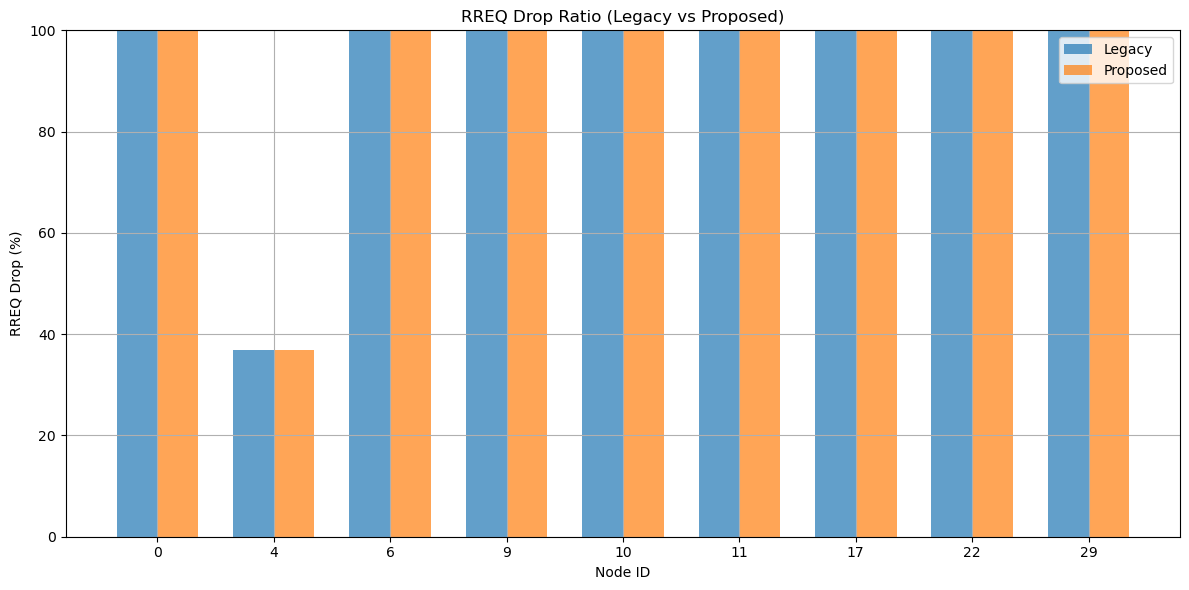

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S10/'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S10/'

def compute_rreq_drop_ratio(base_path, nodes, label):
    drop_ratios = {}
    for node in nodes:
        node_path = os.path.join(base_path + f'N{node}')
        send_log = os.path.join(node_path, 'aodv_send_log.csv')
        drop_log = os.path.join(node_path, 'sinr_drop_log.csv')

        rreq_sent = 0
        rreq_drop = 0

        if os.path.isfile(send_log):
            try:
                df_send = pd.read_csv(send_log, header=None)
                df_send.columns = ['Time', 'Node', 'Packet', 'Dur', 'Type', 'Src', 'Dst', 'TTL', 'Delay', 'TxType']
                df_send['Packet'] = df_send['Packet'].astype(str)
                rreq_sent = df_send['Packet'].str.contains('Rreq', case=False).sum()
            except Exception as e:
                print(f"[{label}] Node {node} - Send log read error: {e}")
        else:
            print(f"[{label}] Node {node} - Send log not found")

        if os.path.isfile(drop_log):
            try:
                df_drop = pd.read_csv(drop_log, names=[
                    'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'None', 'Nearby', 'Total'
                ])
                df_drop['Packet'] = df_drop['Packet'].astype(str)
                rreq_drop = df_drop['Packet'].str.contains('Rreq', case=False).sum()
            except Exception as e:
                print(f"[{label}] Node {node} - Drop log read error: {e}")
        else:
            print(f"[{label}] Node {node} - Drop log not found")

        drop_ratio = (rreq_drop / rreq_sent) * 100 if rreq_sent > 0 else 0.0
        drop_ratios[node] = drop_ratio
        print(f"[{label}] Node {node}: Sent = {rreq_sent}, Dropped = {rreq_drop}, Drop Ratio = {drop_ratio:.2f}%")
    return drop_ratios

# 계산 수행
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node, "Legacy")
rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node, "Proposed")

# 시각화
x = range(len(h_node))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in h_node], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in h_node], width=bar_width, label='Proposed', alpha=0.7)

plt.xticks(x, h_node)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop Ratio (Legacy vs Proposed)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
import pandas as pd

df_all = pd.read_csv('sinr_all_log.csv', header=None, names=['Time', 'SINR', 'PacketType', 'Dummy'], usecols=[0, 1, 2])
rreq_count = df_all[df_all['PacketType'] == 'aodv::Rreq'].shape[0]

df_drop = pd.read_csv('sinr_drop_log.csv', header=None, names=['Time', 'SINR', 'PacketType'], usecols=[0, 1, 2])
rreq_drop_count = df_drop[df_drop['PacketType'] == 'aodv::Rreq'].shape[0]

drop_ratio = rreq_drop_count / rreq_count if rreq_count > 0 else 0

print(f"Total RREQ Count      : {rreq_count}")
print(f"Dropped RREQ Count    : {rreq_drop_count}")
print(f"RREQ Drop Ratio       : {drop_ratio:.4f} ({drop_ratio * 100:.2f}%)")


Total RREQ Count      : 568524
Dropped RREQ Count    : 105673
RREQ Drop Ratio       : 0.1859 (18.59%)


In [61]:
import pandas as pd

df_all = pd.read_csv('sinr_all_log.csv', header=None, names=['Time', 'SINR', 'PacketType', 'Dummy'], usecols=[0, 1, 2])
rreq_count = df_all[df_all['PacketType'] == 'aodv::Rreq'].shape[0]

df_drop = pd.read_csv('sinr_drop_log.csv', header=None, names=['Time', 'SINR', 'PacketType'], usecols=[0, 1, 2])
rreq_drop_count = df_drop[df_drop['PacketType'] == 'aodv::Rreq'].shape[0]

drop_ratio = rreq_drop_count / rreq_count if rreq_count > 0 else 0

print(f"Total RREQ Count      : {rreq_count}")
print(f"Dropped RREQ Count    : {rreq_drop_count}")
print(f"RREQ Drop Ratio       : {drop_ratio:.4f} ({drop_ratio * 100:.2f}%)")


Total RREQ Count      : 568524
Dropped RREQ Count    : 105673
RREQ Drop Ratio       : 0.1859 (18.59%)


In [37]:
df.head()

,Time,SINR,PacketType
0,"30.00269588891,3447.45,aodv::Rreq,",NaN,NaN
1,"30.002695892156,3338.17,aodv::Rreq,",NaN,NaN
2,"30.002695937673,2228.16,aodv::Rreq,",NaN,NaN
3,"30.002695953597,1968.09,aodv::Rreq,",NaN,NaN
4,"30.002695992757,1493.42,aodv::Rreq,",NaN,NaN


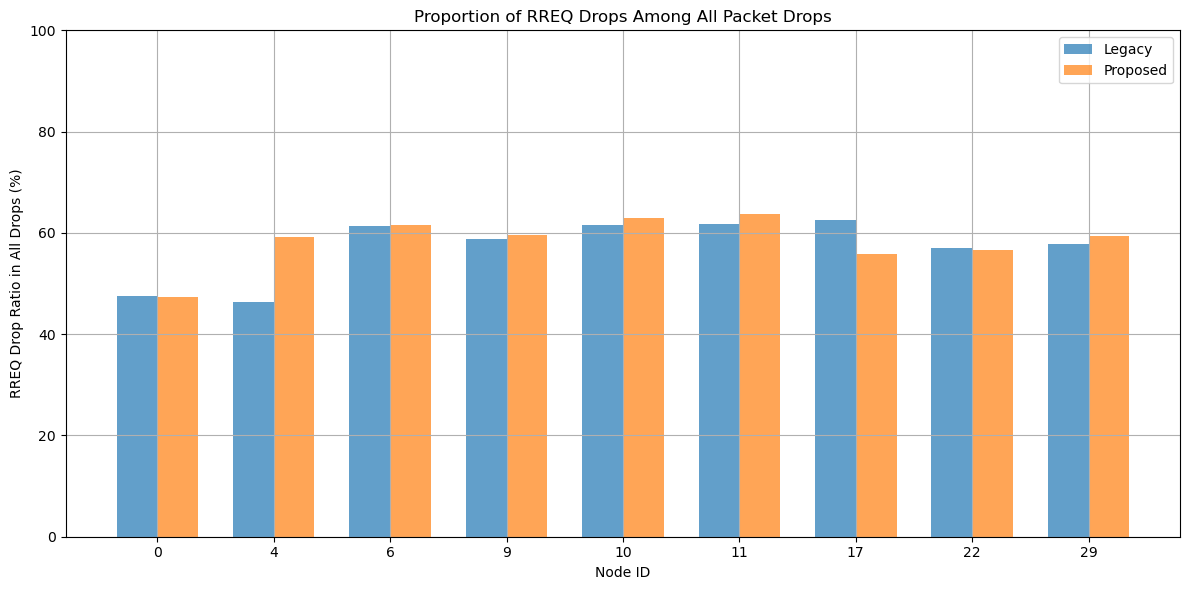

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30/N'

def compute_rreq_drop_ratio_from_total(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_drop = 0
        total_drop = 0

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()
            total_drop = df.shape[0]

        drop_ratio = (rreq_drop / total_drop) * 100 if total_drop > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio_from_total(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio_from_total(base_path_legacy, h_node)

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop Ratio in All Drops (%)')
plt.title('Proportion of RREQ Drops Among All Packet Drops')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


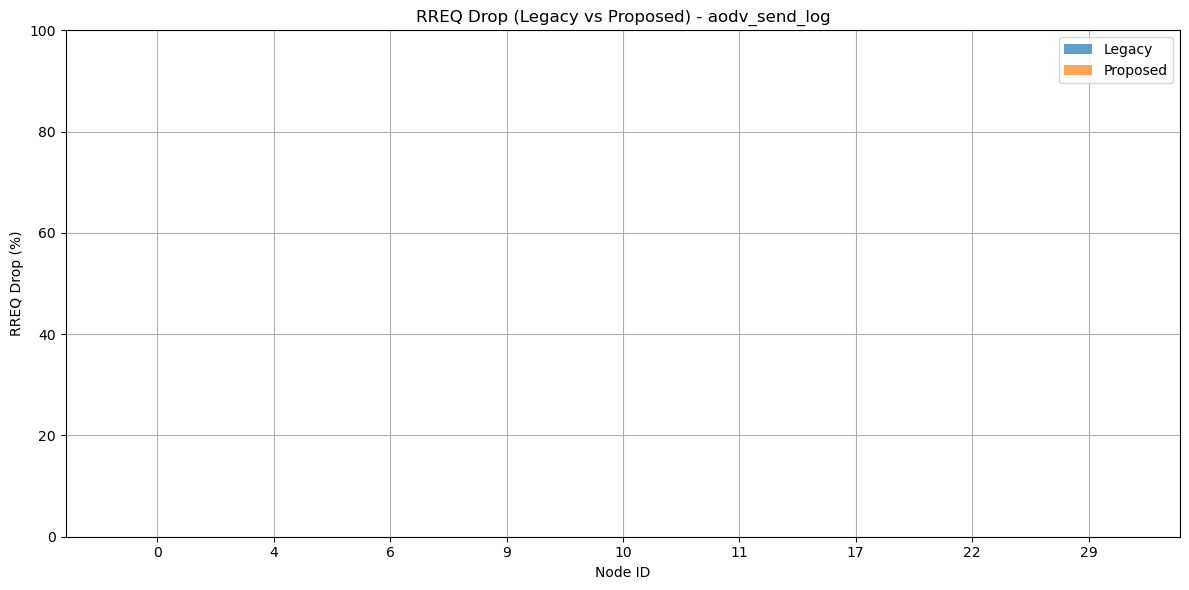

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S10/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S10/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = os.path.join(base_path + str(node))  # N0 등으로 경로 생성
        send_log_path = os.path.join(node_path, 'aodv_send_log.csv')
        drop_log_path = os.path.join(node_path, 'sinr_drop_log.csv')

        if not os.path.isfile(send_log_path) or not os.path.isfile(drop_log_path):
            continue

        df_send = pd.read_csv(send_log_path, header=None)
        df_send.columns = ['Time', 'Node', 'Packet', 'Dur', 'Type', 'Src', 'Dst', 'TTL', 'Delay', 'TxType']
        rreq_sent = df_send[df_send['Packet'].astype(str).str.contains('Rreq', case=False)].shape[0]

        df_drop = pd.read_csv(drop_log_path, names=[
            'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'Nearby', 'Total'
        ])
        rreq_drop = df_drop[df_drop['Packet'].astype(str).str.contains('Rreq', case=False)].shape[0]

        if rreq_sent == 0:
            continue

        drop_ratio = (rreq_drop / rreq_sent) * 100
        result[node] = drop_ratio
    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

nodes = sorted(set(rreq_drop_proposed.keys()) & set(rreq_drop_legacy.keys()))
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed) - aodv_send_log')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
import os
import pandas as pd

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S10/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S10/N'

def debug_rreq_stats(base_path, nodes, label):
    for node in nodes:
        node_path = os.path.join(base_path + str(node))  # 예: N0
        send_log = os.path.join(node_path, 'aodv_send_log.csv')
        drop_log = os.path.join(node_path, 'sinr_drop_log.csv')

        if not os.path.isfile(send_log):
            print(f"[{label}] Node {node}: send log 없음")
            continue
        if not os.path.isfile(drop_log):
            print(f"[{label}] Node {node}: drop log 없음")
            continue

        try:
            df_send = pd.read_csv(send_log, header=None)
            df_send.columns = ['Time', 'Node', 'Packet', 'Dur', 'Type', 'Src', 'Dst', 'TTL', 'Delay', 'TxType']
            rreq_sent = df_send['Packet'].astype(str).str.contains('Rreq', case=False).sum()
        except Exception as e:
            print(f"[{label}] Node {node}: send log 읽기 오류 - {e}")
            continue

        try:
            df_drop = pd.read_csv(drop_log, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'Nearby', 'Total'
            ])
            rreq_drop = df_drop['Packet'].astype(str).str.contains('Rreq', case=False).sum()
        except Exception as e:
            print(f"[{label}] Node {node}: drop log 읽기 오류 - {e}")
            continue

        drop_ratio = (rreq_drop / rreq_sent) * 100 if rreq_sent > 0 else 0.0
        print(f"[{label}] Node {node}: Sent = {rreq_sent}, Dropped = {rreq_drop}, Drop Ratio = {drop_ratio:.2f}%")

debug_rreq_stats(base_path_legacy, h_node, "Legacy")
debug_rreq_stats(base_path_proposed, h_node, "Proposed")


[Legacy] Node 0: Sent = 26106, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 4: Sent = 19, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 6: Sent = 22201, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 9: Sent = 20199, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 10: Sent = 152, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 11: Sent = 1143, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 17: Sent = 536, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 22: Sent = 9287, Dropped = 0, Drop Ratio = 0.00%
[Legacy] Node 29: Sent = 14194, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 0: Sent = 24484, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 4: Sent = 19, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 6: Sent = 6472, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 9: Sent = 24261, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 10: Sent = 152, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 11: Sent = 1143, Dropped = 0, Drop Ratio = 0.00%
[Proposed] Node 17: Sent = 536, Dropped = 0, Drop Ra

In [13]:
import pandas as pd

base_path = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30/N0/'

files = ['rreqCount.txt', 'rrepCount.txt', 'Send.txt', 'sendPing.txt', 'transmitCount.txt']

for fname in files:
    print(f"\n===== {fname} =====")
    try:
        df = pd.read_csv(base_path + fname, header=None)
        print(df.head())
    except Exception as e:
        print(f"Error reading {fname}: {e}")



===== rreqCount.txt =====
           0
0   node[35]
1  node[265]
2  node[243]
3  node[130]
4  node[102]

===== rrepCount.txt =====
           0
0    node[0]
1    node[0]
2  node[251]
3  node[277]
4   node[83]

===== Send.txt =====
        0
0    30:0
1  30.1:1
2  30.2:2
3  30.3:3
4  30.4:4

===== sendPing.txt =====
          0
0    30:0:3
1  30.1:1:3
2  30.2:2:3
3  30.3:3:3
4  30.4:4:3

===== transmitCount.txt =====
                   0
0     rsu[0] : ping0
1     rsu[0] : ping1
2  node[243] : ping0
3     rsu[0] : ping2
4   node[95] : ping0


In [16]:
import os
import pandas as pd

nodes = [0, 4, 6, 7, 9, 10, 11, 17, 22, 29]
base_path_prop = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_lega = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def count_node_occurrences(path, filename):
    count_map = {}
    for node in nodes:
        fpath = os.path.join(path + str(node), filename)
        if os.path.isfile(fpath):
            with open(fpath, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    line = line.strip()
                    if line.startswith('node['):
                        try:
                            id = int(line.replace('node[','').replace(']',''))
                            count_map[id] = count_map.get(id, 0) + 1
                        except:
                            continue
    return count_map

rreq_prop = count_node_occurrences(base_path_prop, 'rreqCount.txt')
rrep_prop = count_node_occurrences(base_path_prop, 'rrepCount.txt')
rreq_lega = count_node_occurrences(base_path_lega, 'rreqCount.txt')
rrep_lega = count_node_occurrences(base_path_lega, 'rrepCount.txt')

data = []
for node in nodes:
    rq_p = rreq_prop.get(node, 0)
    rr_p = rrep_prop.get(node, 0)
    rq_l = rreq_lega.get(node, 0)
    rr_l = rrep_lega.get(node, 0)
    rate_p = round((rr_p / rq_p) * 100, 2) if rq_p > 0 else 0.0
    rate_l = round((rr_l / rq_l) * 100, 2) if rq_l > 0 else 0.0
    data.append([node, rate_p, rate_l])

df = pd.DataFrame(data, columns=['Node', 'RREP_Recv_Prop(%)', 'RREP_Recv_Lega(%)'])
print(df)


   Node  RREP_Recv_Prop(%)  RREP_Recv_Lega(%)
0     0               1.28               2.08
1     4               0.76               1.09
2     6               0.54               1.08
3     7               0.44               0.34
4     9               2.16               0.88
5    10               0.93               0.58
6    11               1.07               0.97
7    17               1.35               1.73
8    22               0.58               0.49
9    29               1.47               0.86


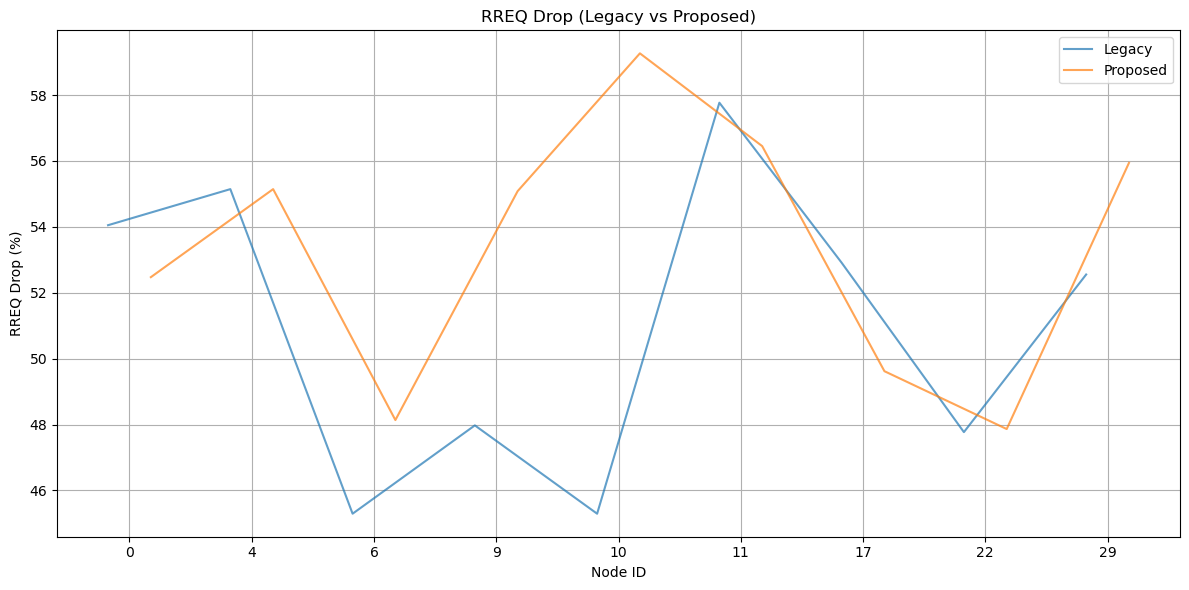

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_total = 0
        rreq_drop = 0

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.plot([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], label='Legacy', alpha=0.7)
plt.plot([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
